# Understanding Homelessness

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
### Key Homelessness Issues
- What is homelessness and definition challenges
- Causes of homelessness
- Homelessness classifications including chronic, sheltered/un

### Point in Time Counts
- History of counts
- Methodological issues
- Rationale for category inclusions

### Data Background
- Originally was going to use a dataset from Kaggle but decided to pull straight from HUD-CoC site. 
- Used [2007 - 2017 PIT Counts by State](https://www.hudexchange.info/resource/3031/pit-and-hic-data-since-2007/) and converted to single database

(borrowed from: https://www.kaggle.com/bltxr9/eda-of-total-homeless-population)
This dataset was generated by CoC and provided to HUD. Note: HUD did not conduct a full data quality review on the data submitted by each CoC.

What is the [Continuum of Care (CoC) Program](https://www.hudexchange.info/programs/coc/)?

Original Data: [PIT and HIC Data Since 2007](https://www.hudexchange.info/resource/3031/pit-and-hic-data-since-2007/)

CoC-HUD Summary Reports: [CoC Homeless Populations and Subpopulations Reports](https://www.hudexchange.info/programs/coc/coc-homeless-populations-and-subpopulations-reports/)

**Other Resources**

[Funding Awards](https://www.hudexchange.info/programs/coc/awards-by-component/)

[CoC Dashboard Reports](https://www.hudexchange.info/programs/coc/coc-dashboard-reports/)

[CoC Housing Inventory Count Reports](https://www.hudexchange.info/programs/coc/coc-housing-inventory-count-reports/)

<a id='wrangling'></a>
## Data Wrangling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
%matplotlib inline

### Inspect Data

In [58]:
df = pd.read_csv('resources/homeless-pit-by-state.csv')
df.head()

,State,Year,Number of CoCs,Total Homeless,Sheltered Homeless,Unsheltered Homeless,Homeless Individuals,Sheltered Homeless Individuals,Unsheltered Homeless Individuals,Homeless People in Families,...,Unsheltered Parenting Youth (Under 25),Parenting Youth Under 18,Sheltered Parenting Youth Under 18,Unsheltered Parenting Youth Under 18,Parenting Youth Age 18-24,Sheltered Parenting Youth Age 18-24,Unsheltered Parenting Youth Age 18-24,Children of Parenting Youth,Sheltered Children of Parenting Youth,Unsheltered Children of Parenting Youth
0,AK,2017,2,"1,845","1,551",294,"1,354","1,060",294,491,...,0,0,0,0,22,22,0,39,39,0
1,AL,2017,8,"3,793","2,656","1,137","2,985","1,950","1,035",808,...,3,6,6,0,23,20,3,39,35,4
2,AR,2017,6,"2,467","1,273","1,194","2,068",937,"1,131",399,...,0,0,0,0,10,10,0,13,13,0
3,AZ,2017,3,"8,947","5,781","3,166","6,488","3,423","3,065","2,459",...,0,0,0,0,81,81,0,112,112,0
4,CA,2017,43,"134,278","42,636","91,642","112,756","25,022","87,734","21,522",...,234,16,11,5,874,645,229,"1,058",782,276


#### Check Data Types and Missing Data

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 605 entries, 0 to 604
Data columns (total 45 columns):
State                                                          605 non-null object
Year                                                           605 non-null int64
Number of CoCs                                                 605 non-null int64
Total Homeless                                                 605 non-null object
Sheltered Homeless                                             605 non-null object
Unsheltered Homeless                                           605 non-null object
Homeless Individuals                                           605 non-null object
Sheltered Homeless Individuals                                 605 non-null object
Unsheltered Homeless Individuals                               605 non-null object
Homeless People in Families                                    605 non-null object
Sheltered Homeless People in Families                          605 

_Observations_
- Missing data is consistent across groups of categories. Visual inspection of data confirms that this is due to additional categories added in subsequent years. 
- Data is all in object format and will need to be converted to float. 
- Not all categories are multually exclusive, confirmation is required to confirm how data is summed.

Visualization of data confirmed that all columns are available from 2015 onwards, 2011 - 2014 contains columns up to Unsheltered Homeless Veterans and 2007 - 2013 contains columns up to Unsheltered Chronically Homeless Individuals.

#### Check unique values

In [10]:
df[['State', 'Year']].nunique()

State    56
Year     11
dtype: int64

_Observations_
- There are 11 years of data contained in the set (2007 - 2017)
- Need to confirm what states are covered within state
- Not worried about unique values for the other columns

In [13]:
df['State'].unique()

array(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
       'GU', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD',
       'ME', 'MI', 'MN', 'MO', 'MP', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH',
       'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI', 'SC',
       'SD', 'TN', 'TX', 'UT', 'VA', 'VI', 'VT', 'WA', 'WI', 'WV', 'WY',
       'KS*'], dtype=object)

- It appears that the list includes some US territories and DC. I am less familiar with state abbreviations - will need to get state names for reference.
- One of states is KS*, note from dataset says: The number of CoCs in 2017 was 399. However, MO-604 merged in 2016 and covers territory in both MO and KS, contributing to the PIT count in both states. This will need to be inspected individually to understand.
- It was determined that only regions in the USA would be included.

### Clean Data

#### Add State Names

In [42]:
df_state = pd.read_csv("resources/states.csv")
df_state.head()

,abbr,name
0,AL,Alabama
1,AK,Alaska
2,AZ,Arizona
3,AR,Arkansas
4,CA,California


In [59]:
df = df.merge(df_state, left_on='State', right_on='abbr', how='left')
df.head()

,State,Year,Number of CoCs,Total Homeless,Sheltered Homeless,Unsheltered Homeless,Homeless Individuals,Sheltered Homeless Individuals,Unsheltered Homeless Individuals,Homeless People in Families,...,Sheltered Parenting Youth Under 18,Unsheltered Parenting Youth Under 18,Parenting Youth Age 18-24,Sheltered Parenting Youth Age 18-24,Unsheltered Parenting Youth Age 18-24,Children of Parenting Youth,Sheltered Children of Parenting Youth,Unsheltered Children of Parenting Youth,abbr,name
0,AK,2017,2,"1,845","1,551",294,"1,354","1,060",294,491,...,0,0,22,22,0,39,39,0,AK,Alaska
1,AL,2017,8,"3,793","2,656","1,137","2,985","1,950","1,035",808,...,6,0,23,20,3,39,35,4,AL,Alabama
2,AR,2017,6,"2,467","1,273","1,194","2,068",937,"1,131",399,...,0,0,10,10,0,13,13,0,AR,Arkansas
3,AZ,2017,3,"8,947","5,781","3,166","6,488","3,423","3,065","2,459",...,0,0,81,81,0,112,112,0,AZ,Arizona
4,CA,2017,43,"134,278","42,636","91,642","112,756","25,022","87,734","21,522",...,11,5,874,645,229,"1,058",782,276,CA,California


In [60]:
df.drop("abbr", axis=1, inplace=True)
df.shape

(605, 46)

A check was done for abbreviations that still did not have state names.

In [45]:
df[['State', 'name']][df['name'].isnull()].groupby('State').count()

,name
State,
DC,0
GU,0
KS*,0
MP,0
PR,0
VI,0


According to  [this site](http://www.stateabbreviations.us/) the additional details are:
- DC = Washington DC
- GU = Guam
- KS* = (as outlined above) Kansas*
- MP = Northern Mariana Islands
- PR = Puerto Rico
- VI = Virgin Islands

The state names were added to the dataframe.

In [61]:
d = {'state': ['DC', 'GU', 'KS*', 'MP', 'PR', 'VI'], 'addstate_name': ['Washington DC', 'Guam', 'Kansas*', 'Northern Mariana Islands', 'Puerto Rico', 'Virgin Islands']}
state_df = pd.DataFrame(data=d)
df = df.merge(state_df, left_on='State', right_on='state', how='left')
df.head()

,State,Year,Number of CoCs,Total Homeless,Sheltered Homeless,Unsheltered Homeless,Homeless Individuals,Sheltered Homeless Individuals,Unsheltered Homeless Individuals,Homeless People in Families,...,Unsheltered Parenting Youth Under 18,Parenting Youth Age 18-24,Sheltered Parenting Youth Age 18-24,Unsheltered Parenting Youth Age 18-24,Children of Parenting Youth,Sheltered Children of Parenting Youth,Unsheltered Children of Parenting Youth,name,addstate_name,state
0,AK,2017,2,"1,845","1,551",294,"1,354","1,060",294,491,...,0,22,22,0,39,39,0,Alaska,NaN,NaN
1,AL,2017,8,"3,793","2,656","1,137","2,985","1,950","1,035",808,...,0,23,20,3,39,35,4,Alabama,NaN,NaN
2,AR,2017,6,"2,467","1,273","1,194","2,068",937,"1,131",399,...,0,10,10,0,13,13,0,Arkansas,NaN,NaN
3,AZ,2017,3,"8,947","5,781","3,166","6,488","3,423","3,065","2,459",...,0,81,81,0,112,112,0,Arizona,NaN,NaN
4,CA,2017,43,"134,278","42,636","91,642","112,756","25,022","87,734","21,522",...,5,874,645,229,"1,058",782,276,California,NaN,NaN


In [62]:
df['name'].fillna(df['addstate_name'], inplace=True)
df.drop(['addstate_name', 'state'], axis=1, inplace=True)
df.head()

,State,Year,Number of CoCs,Total Homeless,Sheltered Homeless,Unsheltered Homeless,Homeless Individuals,Sheltered Homeless Individuals,Unsheltered Homeless Individuals,Homeless People in Families,...,Parenting Youth Under 18,Sheltered Parenting Youth Under 18,Unsheltered Parenting Youth Under 18,Parenting Youth Age 18-24,Sheltered Parenting Youth Age 18-24,Unsheltered Parenting Youth Age 18-24,Children of Parenting Youth,Sheltered Children of Parenting Youth,Unsheltered Children of Parenting Youth,name
0,AK,2017,2,"1,845","1,551",294,"1,354","1,060",294,491,...,0,0,0,22,22,0,39,39,0,Alaska
1,AL,2017,8,"3,793","2,656","1,137","2,985","1,950","1,035",808,...,6,6,0,23,20,3,39,35,4,Alabama
2,AR,2017,6,"2,467","1,273","1,194","2,068",937,"1,131",399,...,0,0,0,10,10,0,13,13,0,Arkansas
3,AZ,2017,3,"8,947","5,781","3,166","6,488","3,423","3,065","2,459",...,0,0,0,81,81,0,112,112,0,Arizona
4,CA,2017,43,"134,278","42,636","91,642","112,756","25,022","87,734","21,522",...,16,11,5,874,645,229,"1,058",782,276,California


In [27]:
df.name.isnull().sum()

0

After confirming that all state name info had been added, the non-US regions were then removed.

In [48]:
df.shape

(605, 46)

In [63]:
drop_rows = df.query('State == "GU" or State == "MP" or State == "PR" or State == "VI"').index
drop_rows

Int64Index([ 11,  26,  41,  49,  66,  81,  96, 104, 121, 136, 151, 159, 176,
            191, 206, 214, 231, 246, 261, 269, 286, 301, 316, 324, 341, 356,
            371, 379, 396, 411, 426, 434, 451, 466, 481, 489, 506, 521, 536,
            544, 561, 576, 591, 599],
           dtype='int64')

In [76]:
df.drop(drop_rows, inplace=True)
df.shape

(561, 46)

In [64]:
df.to_csv('df-named.csv', index=False)

#### Convert Coumns to `float`

It was discovered that in some cases missing values were indicated by `.` These were replaced with NaN to assist in further conversion to float.

In [69]:
df.replace('.', np.NaN, inplace=True)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 605 entries, 0 to 604
Data columns (total 46 columns):
State                                                          605 non-null object
Year                                                           605 non-null int64
Number of CoCs                                                 605 non-null int64
Total Homeless                                                 595 non-null object
Sheltered Homeless                                             595 non-null object
Unsheltered Homeless                                           595 non-null object
Homeless Individuals                                           595 non-null object
Sheltered Homeless Individuals                                 595 non-null object
Unsheltered Homeless Individuals                               595 non-null object
Homeless People in Families                                    595 non-null object
Sheltered Homeless People in Families                          595 

This increased the number of missing values and further inspection will be required.

All commas needed to be removed from the str values to allow conversion to `float` while managing `NaN` values.

In [71]:
df[df.columns] = df[df.columns].replace({',':''}, regex = True)

In [72]:
df[df.columns[3:45]] = df[df.columns[3:45]].astype(float)
df.head()

,State,Year,Number of CoCs,Total Homeless,Sheltered Homeless,Unsheltered Homeless,Homeless Individuals,Sheltered Homeless Individuals,Unsheltered Homeless Individuals,Homeless People in Families,...,Parenting Youth Under 18,Sheltered Parenting Youth Under 18,Unsheltered Parenting Youth Under 18,Parenting Youth Age 18-24,Sheltered Parenting Youth Age 18-24,Unsheltered Parenting Youth Age 18-24,Children of Parenting Youth,Sheltered Children of Parenting Youth,Unsheltered Children of Parenting Youth,name
0,AK,2017,2,1845.0,1551.0,294.0,1354.0,1060.0,294.0,491.0,...,0.0,0.0,0.0,22.0,22.0,0.0,39.0,39.0,0.0,Alaska
1,AL,2017,8,3793.0,2656.0,1137.0,2985.0,1950.0,1035.0,808.0,...,6.0,6.0,0.0,23.0,20.0,3.0,39.0,35.0,4.0,Alabama
2,AR,2017,6,2467.0,1273.0,1194.0,2068.0,937.0,1131.0,399.0,...,0.0,0.0,0.0,10.0,10.0,0.0,13.0,13.0,0.0,Arkansas
3,AZ,2017,3,8947.0,5781.0,3166.0,6488.0,3423.0,3065.0,2459.0,...,0.0,0.0,0.0,81.0,81.0,0.0,112.0,112.0,0.0,Arizona
4,CA,2017,43,134278.0,42636.0,91642.0,112756.0,25022.0,87734.0,21522.0,...,16.0,11.0,5.0,874.0,645.0,229.0,1058.0,782.0,276.0,California


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 561 entries, 0 to 604
Data columns (total 46 columns):
State                                                          561 non-null object
Year                                                           561 non-null int64
Number of CoCs                                                 561 non-null int64
Total Homeless                                                 561 non-null float64
Sheltered Homeless                                             561 non-null float64
Unsheltered Homeless                                           561 non-null float64
Homeless Individuals                                           561 non-null float64
Sheltered Homeless Individuals                                 561 non-null float64
Unsheltered Homeless Individuals                               561 non-null float64
Homeless People in Families                                    561 non-null float64
Sheltered Homeless People in Families                       

This confirms that all data has been adjusted as desired.

#### Confirm Column Configurations
To confirm how each of the individual columns are grouped, the values were summed and then tested.

A series of tests were completed to confirm the expected combinations. Each row was tested to determine rows where the expected combination was true (the expected sum should be 561).

`Total Homeless` = `Sheltered Homeless` + `Unsheltered Homeless`

In [83]:
((df['Sheltered Homeless'] + df['Unsheltered Homeless']) == df['Total Homeless']).sum()

561

`Homeless Individuals` = `Sheltered Homeless Individuals` + `Unsheltered Homeless Individuals`

In [82]:
((df['Sheltered Homeless Individuals'] + df['Unsheltered Homeless Individuals']) == df['Homeless Individuals']).sum()

561

`Homeless People in Families` = `Sheltered Homeless People in Families` + `Unsheltered Homeless People in Families`

In [84]:
((df['Sheltered Homeless People in Families'] + df['Unsheltered Homeless People in Families']) == df['Homeless People in Families']).sum()

561

`Total Homeless` = `Homeless Individuals` + `Homeless People in Families`

In [85]:
((df['Homeless Individuals'] + df['Homeless People in Families']) == df['Total Homeless']).sum()

561

`Chronically Homeless` = `Sheltered Chronically Homeless` + `Unsheltered Chronically Homeless`

In [86]:
((df['Sheltered Chronically Homeless'] + df['Unsheltered Chronically Homeless']) == df['Chronically Homeless']).sum()

561

It is also expected that `Chronically Homeless` is a subset of `Total Homeless` and so the values for `Chronically Homeless` should be less than that of the total.

In [87]:
(df['Chronically Homeless'] < df['Total Homeless']).sum()

561

`Sheltered Chronically Homeless` = `Sheltered Chronically Homeless Individuals` + `Sheltered Chronically Homeless People in Families`

In [88]:
((df['Sheltered Chronically Homeless Individuals'] + df['Sheltered Chronically Homeless People in Families']) == df['Sheltered Chronically Homeless']).sum()

357

This is an unexpected result. Need to look into where the inequalities lie.

In [89]:
not_equal = (df['Sheltered Chronically Homeless Individuals'] + df['Sheltered Chronically Homeless People in Families']) != df['Sheltered Chronically Homeless']
df[['Year', 'State', 'Sheltered Chronically Homeless Individuals', 'Sheltered Chronically Homeless People in Families', 'Sheltered Chronically Homeless']][not_equal]

,Year,State,Sheltered Chronically Homeless Individuals,Sheltered Chronically Homeless People in Families,Sheltered Chronically Homeless
385,2010,AK,270.0,NaN,119.0
386,2010,AL,911.0,NaN,502.0
387,2010,AR,247.0,NaN,145.0
388,2010,AZ,1052.0,NaN,544.0
389,2010,CA,6600.0,NaN,6964.0
390,2010,CO,853.0,NaN,510.0
391,2010,CT,423.0,NaN,595.0
392,2010,DC,563.0,NaN,1723.0
393,2010,DE,69.0,NaN,71.0
394,2010,FL,2818.0,NaN,3700.0


The primary cause of this result is that there are only 357 non-null results for `Sheltered Chronically Homeless People in Families` because this is one of the columns that was added in 2011. In all cases where it does not match, no information has been reported for `Sheltered Chronically Homeless People in Families`. Typically, the number of `Sheltered Chronically Homeless Individuals` is less than `Sheltered Chronically Homeless`, but in some cases it is not. This suggests an error in counting methodology/understanding. It would seem that with the introduction of additional counting requirements, clarification was also made about how to count these two categories.

This suggests that interpretation of `Sheltered Chronically Homeless` before 2010 may not be accurate. It maybe worth investigating how CoC/HUD interpreted the results for states when the number of individuals is higher than what would be considered the total.

In [97]:
greater_than = df['Sheltered Chronically Homeless Individuals'] > df['Sheltered Chronically Homeless']
df[['Year', 'State', 'Sheltered Chronically Homeless Individuals', 'Sheltered Chronically Homeless']][greater_than]

,Year,State,Sheltered Chronically Homeless Individuals,Sheltered Chronically Homeless
385,2010,AK,270.0,119.0
386,2010,AL,911.0,502.0
387,2010,AR,247.0,145.0
388,2010,AZ,1052.0,544.0
390,2010,CO,853.0,510.0
397,2010,HI,176.0,96.0
398,2010,IA,207.0,182.0
399,2010,ID,128.0,37.0
401,2010,IN,633.0,478.0
402,2010,KS,660.0,149.0


`Unsheltered Chronically Homeless` = `Unsheltered Chronically Homeless Individuals` + `Unsheltered Chronically Homeless People in Families`

In [92]:
((df['Unsheltered Chronically Homeless Individuals'] + df['Unsheltered Chronically Homeless People in Families']) == df['Unsheltered Chronically Homeless']).sum()

357

It appears that a similar issue to what was happening with the `Sheltered Chronically Homeless` numbers is happening with the `Unsheltered Chronically Homeless` numbers.

In [96]:
not_equal = (df['Unsheltered Chronically Homeless Individuals'] + df['Unsheltered Chronically Homeless People in Families']) != df['Unsheltered Chronically Homeless']
df[['Year', 'State', 'Unsheltered Chronically Homeless Individuals', 'Unsheltered Chronically Homeless']][not_equal]

,Year,State,Unsheltered Chronically Homeless Individuals,Unsheltered Chronically Homeless
385,2010,AK,30.0,45.0
386,2010,AL,178.0,541.0
387,2010,AR,115.0,250.0
388,2010,AZ,1178.0,1391.0
389,2010,CA,11004.0,24271.0
390,2010,CO,463.0,922.0
391,2010,CT,60.0,182.0
392,2010,DC,16.0,387.0
393,2010,DE,5.0,26.0
394,2010,FL,4976.0,5532.0


Again, the discrepancies only occur between 2007 to 2010. These numbers will also need to be checked with HUD reports to confirm interpretation for 2007 to 2010 for the states where the individual count is higher than what would be considered the total.

In [98]:
greater_than = df['Unsheltered Chronically Homeless Individuals'] > df['Unsheltered Chronically Homeless']
df[['Year', 'State', 'Unsheltered Chronically Homeless Individuals', 'Unsheltered Chronically Homeless']][greater_than]

,Year,State,Unsheltered Chronically Homeless Individuals,Unsheltered Chronically Homeless
399,2010,ID,111.0,74.0
402,2010,KS,51.0,42.0
413,2010,MT,106.0,49.0
415,2010,ND,5.0,3.0
438,2010,WV,183.0,158.0
454,2009,ID,76.0,53.0
457,2009,KS,60.0,42.0
468,2009,MT,78.0,53.0
500,2008,CO,693.0,633.0
509,2008,ID,53.0,35.0


Side note: there are far less instances of the individual being greater than what would be considered the total for the Unsheltered chronic homeless populations.

The remaining columns will all have missing values for the years that they were not included. The sum is therefore compared to the non-null values for their columns. For the next section this is 357.

`Homeless Veterans` = `Sheltered Homeless Veterans` + `Unsheltered Homeless Vetereans`

In [94]:
((df['Sheltered Homeless Veterans'] + df['Unsheltered Homeless Veterans']) == df['Homeless Veterans']).sum()

357

It is expected that `Homeless Veterans` is a subset of `Total Homeless` and should be lower.

In [99]:
(df['Homeless Veterans'] < df['Total Homeless']).sum()

357

For the remaining columns, the number of non-null values is 153 as these columns were only added in 2015.

`Homeless Unaccompanied Youth (Under 25)` = `Sheltered Homeless Unaccompanied Youth (Under 25)` + `Unsheltered Homeless Unaccompanied Youth (Under 25)`

In [100]:
((df['Sheltered Homeless Unaccompanied Youth (Under 25)'] + df['Unsheltered Homeless Unaccompanied Youth (Under 25)']) == df['Homeless Unaccompanied Youth (Under 25)']).sum()

153

It is expected that `Homeless Unaccompanied Youth (Under 25)` is a subset of `Homeless Individuals` and should be lower.

In [101]:
(df['Homeless Unaccompanied Youth (Under 25)'] < df['Homeless Individuals']).sum()

153

`Homeless Unaccompanied Youth (Under 25)` = `Homeless Unaccompanied Children (Under 18)` + `Homeless Unaccompanied Young Adults (Age 18-24)`

In [102]:
((df['Homeless Unaccompanied Children (Under 18)'] + df['Homeless Unaccompanied Young Adults (Age 18-24)']) == df['Homeless Unaccompanied Youth (Under 25)']).sum()

153

`Homeless Unaccompanied Children (Under 18)` = `Sheltered Homeless Unaccompanied Children (Under 18)` + `Unsheltered Homeless Unaccompanied Children (Under 18)`

In [103]:
((df['Sheltered Homeless Unaccompanied Children (Under 18)'] + df['Unsheltered Homeless Unaccompanied Children (Under 18)']) == df['Homeless Unaccompanied Children (Under 18)']).sum()

153

`Homeless Unaccompanied Young Adults (Age 18 - 24)` = `Sheltered Homeless Unaccompanied Young Adults (Age 18 - 24)` + `Unsheltered Homeless Unaccompanied Young Adults (Age 18 - 24)`

In [104]:
((df['Sheltered Homeless Unaccompanied Young Adults (Age 18-24)'] + df['Unsheltered Homeless Unaccompanied Young Adults (Age 18-24)']) == df['Homeless Unaccompanied Young Adults (Age 18-24)']).sum()

153

`Parenting Youth (Under 25)` = `Sheltered Parenting Youth (Under 25)` + `Unsheltered Parenting Youth (Under 25)`

In [105]:
((df['Sheltered Parenting Youth (Under 25)'] + df['Unsheltered Parenting Youth (Under 25)']) == df['Parenting Youth (Under 25)']).sum()

153

`Parenting Youth (Under 25)` = `Parenting Youth Under 18` + `Parenting Youth Age 18-24`

In [106]:
((df['Parenting Youth Under 18'] + df['Parenting Youth Age 18-24']) == df['Parenting Youth (Under 25)']).sum()

153

`Parenting Youth Age 18-24` = `Sheltered Parenting Youth Age 18-24` + `Unsheltered Parenting Youth Age 18-24`

In [108]:
((df['Sheltered Parenting Youth Age 18-24'] + df['Unsheltered Parenting Youth Age 18-24']) == df['Parenting Youth Age 18-24']).sum()

153

`Parenting Youth Under 18` = `Sheltered Parenting Youth Under18` + `Unsheltered Parenting Youth Under 18`

In [109]:
((df['Sheltered Parenting Youth Under 18'] + df['Unsheltered Parenting Youth Under 18']) == df['Parenting Youth Under 18']).sum()

153

`Children of Parenting Youth` = `Sheltered Children of Parenting Youth` + `Unsheltered Children of Parenting Youth`

In [110]:
((df['Sheltered Children of Parenting Youth'] + df['Unsheltered Children of Parenting Youth']) == df['Children of Parenting Youth']).sum()

153

Children of parenting youth and their parents create a subset of `Homeless People in Families` and their sum should be less than this. 

In [111]:
((df['Parenting Youth (Under 25)'] + df['Children of Parenting Youth']) < df['Homeless People in Families']).sum()

153

This is considered sufficient comparisons to confirm that the data is structured in the way intended. In all cases, except those of Chronic Homelessness, the data configuration aligned with expectations. 

It is noted that there are a number of different ways that data can be divided by on factors of sheltering type (sheltered or unsheltered), homelessness type (chronic or not), family status (individual or family), veteran status (veteran or not), age (under 25 or not), but not all segmentations are carried across each category.

The groupings are as follows.

**By Homelessness Type**

In [19]:
%%html
<img src="img/data_by_type.JPG", width=700, height=700>

**By Family Status**

In [15]:
%%html
<img src="img/data_by_family.JPG", width=900, height=900>

**By Age**

In [16]:
%%html
<img src="img/data_by_age.JPG", width=700, height=700>

**By Veteran Status**

In [20]:
%%html
<img src="img/data_by_veteran.JPG", width=500, height=500>

Given the various combinations, the plan is to construct multiple databases that appropriately group the data to allow examination of different questions.

In [112]:
df.to_csv("homeless-clean.csv", index=False)

#### Rename Columns

Change the columns names so that they are easier to reference.

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 561 entries, 0 to 604
Data columns (total 46 columns):
State                                                          561 non-null object
Year                                                           561 non-null int64
Number of CoCs                                                 561 non-null int64
Total Homeless                                                 561 non-null float64
Sheltered Homeless                                             561 non-null float64
Unsheltered Homeless                                           561 non-null float64
Homeless Individuals                                           561 non-null float64
Sheltered Homeless Individuals                                 561 non-null float64
Unsheltered Homeless Individuals                               561 non-null float64
Homeless People in Families                                    561 non-null float64
Sheltered Homeless People in Families                       

In [117]:
labels = ['state', 'year', 'cocs', 'total', 'sheltered', 'unsheltered', 'individual', 'sh_ind', 'uns_ind', 'family', 'sh_fam', 'uns_fam', 'chronic', 'sh_chronic', 'uns_chronic', 'chronic_ind', 'sh_chronic_ind', 'uns_chronic_ind', 'chronic_fam', 'sh_chronic_fam', 'uns_chronic_fam', 'veteran', 'sh_veteran', 'uns_veteran', 'youth', 'sh_youth', 'uns_youth', 'child', 'sh_child', 'uns_child', 'yadult', 'sh_yadult', 'uns_yadult', 'yparent', 'sh_yparent', 'uns_yparent', 'yparent_u18', 'sh_yparent_u18', 'uns_yparent_u18', 'yparent_18to24', 'sh_yparent_18to24', 'uns_yparent_18to24', 'ypchild', 'sh_ypchild', 'uns_ypchild', 'state_name']
df = pd.read_csv('homeless-clean.csv', header=0, names=labels)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 46 columns):
state                 561 non-null object
year                  561 non-null int64
cocs                  561 non-null int64
total                 561 non-null float64
sheltered             561 non-null float64
unsheltered           561 non-null float64
individual            561 non-null float64
sh_ind                561 non-null float64
uns_ind               561 non-null float64
family                561 non-null float64
sh_fam                561 non-null float64
uns_fam               561 non-null float64
chronic               561 non-null float64
sh_chronic            561 non-null float64
uns_chronic           561 non-null float64
chronic_ind           561 non-null float64
sh_chronic_ind        561 non-null float64
uns_chronic_ind       561 non-null float64
chronic_fam           357 non-null float64
sh_chronic_fam        357 non-null float64
uns_chronic_fam       357 non-null float

These checks also confirm that there are no other missing values beyond those where the columns were not included for that year's count.

In [119]:
df.to_csv("homeless-final.csv", index=False)

### Group Data

As described above, there are a number of different configurations of data that can be made based on classifications. It was determined that data would be grouped into different datasets based on classification for ease of analysis. Additional classifications are possible but these can all be drawn from the main dataset.

#### By Sheltering Type

In [92]:
df_shelter = df[['state', 'state_name', 'year', 'total', 'sheltered', 'unsheltered']]
df_shelter.head()

,state,state_name,year,total,sheltered,unsheltered
0,AK,Alaska,2017,1845.0,1551.0,294.0
1,AL,Alabama,2017,3793.0,2656.0,1137.0
2,AR,Arkansas,2017,2467.0,1273.0,1194.0
3,AZ,Arizona,2017,8947.0,5781.0,3166.0
4,CA,California,2017,134278.0,42636.0,91642.0


In [93]:
df_shelter.to_csv('homeless-shelter.csv', index=False)

#### By Family Status

Confirm assumption about composition of `family` data: `yparent` and `ypchild` should be a subset of `family`

In [120]:
(df['family'] > (df['yparent'] + df['ypchild'])).sum()

153

This matches the amount of non-null data for these columns.

In [123]:
df_family = df[['state', 'state_name', 'year', 'total', 'individual', 'family', 'yparent', 'ypchild']]
df_family['non_ypfam'] = df_family.family - (df_family.yparent + df_family.ypchild)
df_family = df_family.join(df[['sh_ind', 'uns_ind', 'sh_fam', 'uns_fam', 'sh_yparent', 'uns_yparent', 'sh_ypchild', 'uns_ypchild']])
df_family['sh_non_ypfam'] = df_family.sh_fam - (df_family.sh_yparent + df_family.sh_ypchild)
df_family['uns_non_ypfam'] = df_family.uns_fam - (df_family.uns_yparent + df_family.uns_ypchild)
df_family.head()

C:\Users\rebecca-barnes\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,state,state_name,year,total,individual,family,yparent,ypchild,non_ypfam,sh_ind,uns_ind,sh_fam,uns_fam,sh_yparent,uns_yparent,sh_ypchild,uns_ypchild,sh_non_ypfam,uns_non_ypfam
0,AK,Alaska,2017,1845.0,1354.0,491.0,22.0,39.0,430.0,1060.0,294.0,491.0,0.0,22.0,0.0,39.0,0.0,430.0,0.0
1,AL,Alabama,2017,3793.0,2985.0,808.0,29.0,39.0,740.0,1950.0,1035.0,706.0,102.0,26.0,3.0,35.0,4.0,645.0,95.0
2,AR,Arkansas,2017,2467.0,2068.0,399.0,10.0,13.0,376.0,937.0,1131.0,336.0,63.0,10.0,0.0,13.0,0.0,313.0,63.0
3,AZ,Arizona,2017,8947.0,6488.0,2459.0,81.0,112.0,2266.0,3423.0,3065.0,2358.0,101.0,81.0,0.0,112.0,0.0,2165.0,101.0
4,CA,California,2017,134278.0,112756.0,21522.0,890.0,1058.0,19574.0,25022.0,87734.0,17614.0,3908.0,656.0,234.0,782.0,276.0,16176.0,3398.0


Because many of these columns only reported information for some of the years, the columns will be dropped to limit examination to years of available data. It is not considered appropriate to extrapolate trends in subsequent years to previous years because changing patterns in homelessness numbers are an expected phenomenon.

In [124]:
df_family.dropna(inplace=True)
df_family.to_csv('homeless-family.csv', index=False)

#### By Homelessness Type

In [113]:
df_type = df[['state', 'state_name', 'year', 'total', 'chronic', 'sh_chronic', 'uns_chronic']]
df_type['non_chronic'] = df_type.total - df.chronic
df_type = df_type.join(df[['sh_chronic_ind', 'uns_chronic_ind', 'sh_chronic_fam', 'uns_chronic_fam']])
df_type.head()

C:\Users\rebecca-barnes\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,state,state_name,year,total,chronic,sh_chronic,uns_chronic,non_chronic,sh_chronic_ind,uns_chronic_ind,sh_chronic_fam,uns_chronic_fam
0,AK,Alaska,2017,1845.0,257.0,158.0,99.0,1588.0,117.0,99.0,41.0,0.0
1,AL,Alabama,2017,3793.0,363.0,171.0,192.0,3430.0,152.0,192.0,19.0,0.0
2,AR,Arkansas,2017,2467.0,473.0,147.0,326.0,1994.0,138.0,312.0,9.0,14.0
3,AZ,Arizona,2017,8947.0,1552.0,546.0,1006.0,7395.0,492.0,971.0,54.0,35.0
4,CA,California,2017,134278.0,37360.0,5235.0,32125.0,96918.0,4430.0,31368.0,805.0,757.0


In this case, the primary focus 'type of homelessness' has been included for all years and so no data will be dropped even if some columns do have missing values.

In [114]:
df_type.to_csv('homeless-type.csv', index=False)

#### By Veteran Status

In [125]:
df_veteran = df[['state', 'state_name', 'year', 'total', 'veteran']]
df_veteran['non_veteran'] = df_veteran.total - df_veteran.veteran
df_veteran = df_veteran.join(df[['sh_veteran', 'uns_veteran']])
df_veteran.head()

C:\Users\rebecca-barnes\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,state,state_name,year,total,veteran,non_veteran,sh_veteran,uns_veteran
0,AK,Alaska,2017,1845.0,124.0,1721.0,95.0,29.0
1,AL,Alabama,2017,3793.0,269.0,3524.0,202.0,67.0
2,AR,Arkansas,2017,2467.0,239.0,2228.0,130.0,109.0
3,AZ,Arizona,2017,8947.0,970.0,7977.0,641.0,329.0
4,CA,California,2017,134278.0,11472.0,122806.0,3815.0,7657.0


Because many of these columns only reported information for some of the years, the columns will be dropped to limit examination to years of available data. It is not considered appropriate to extrapolate trends in subsequent years to previous years because changing patterns in homelessness numbers are an expected phenomenon.

In [126]:
df_veteran.dropna(inplace=True)
df_veteran.to_csv('homeless-veteran.csv', index=False)

#### By Age

Young people are unaccompanied young people (youth, yadult, child), and young parents (of all ages) and their children. However, the remainder are not always adults - there are children found in families not led by young parents.

Therefore, only unaccompanied youth can be compared to individuals to determine the number of individual adults.

In [121]:
(df['individual'] > df['youth']).sum()

153

This matches the amount of non-null data for youth.

In [127]:
(df['sh_ind'] > df['sh_youth']).sum()

153

In [128]:
(df['uns_ind'] > df['uns_youth']).sum()

153

In [129]:
df_age = df[['state', 'state_name', 'year', 'total', 'youth', 'child', 'yadult', 'yparent', 'yparent_u18', 'yparent_18to24', 'ypchild']]
df_age['adult'] = df.individual - df.youth
df_age['non_ypfam'] = df_family.family - (df_family.yparent + df_family.ypchild)
df_age = df_age.join(df[[
                        'sh_youth', 'uns_youth', 'sh_child', 'uns_child', 'sh_yadult', 'uns_yadult', 'sh_yparent', 'uns_yparent', 
                        'sh_yparent_u18', 'uns_yparent_u18', 'sh_yparent_18to24', 'uns_yparent_18to24', 'sh_ypchild', 'uns_ypchild'
                        ]])
df_age['sh_adult'] = df.sh_ind - df.sh_youth
df_age['uns_adult'] = df.uns_ind - df.uns_youth
df_age['sh_non_ypfam'] = df_family.sh_fam - (df_family.sh_yparent + df_family.sh_ypchild)
df_age['uns_non_ypfam'] = df_family.uns_fam - (df_family.uns_yparent + df_family.uns_ypchild)
df_age.head()

C:\Users\rebecca-barnes\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\rebecca-barnes\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,state,state_name,year,total,youth,child,yadult,yparent,yparent_u18,yparent_18to24,...,sh_yparent_u18,uns_yparent_u18,sh_yparent_18to24,uns_yparent_18to24,sh_ypchild,uns_ypchild,sh_adult,uns_adult,sh_non_ypfam,uns_non_ypfam
0,AK,Alaska,2017,1845.0,162.0,15.0,147.0,22.0,0.0,22.0,...,0.0,0.0,22.0,0.0,39.0,0.0,918.0,274.0,430.0,0.0
1,AL,Alabama,2017,3793.0,294.0,36.0,258.0,29.0,6.0,23.0,...,6.0,0.0,20.0,3.0,35.0,4.0,1768.0,923.0,645.0,95.0
2,AR,Arkansas,2017,2467.0,208.0,17.0,191.0,10.0,0.0,10.0,...,0.0,0.0,10.0,0.0,13.0,0.0,850.0,1010.0,313.0,63.0
3,AZ,Arizona,2017,8947.0,578.0,55.0,523.0,81.0,0.0,81.0,...,0.0,0.0,81.0,0.0,112.0,0.0,3078.0,2832.0,2165.0,101.0
4,CA,California,2017,134278.0,15458.0,1649.0,13809.0,890.0,16.0,874.0,...,11.0,5.0,645.0,229.0,782.0,276.0,22313.0,74985.0,16176.0,3398.0


Again, rows with missing data will be dropped for the same reasons as described above.

In [130]:
df_age.dropna(inplace=True)
df_age.to_csv('homeless-age.csv', index=False)

<a id='eda'></a>
## Exploratory Data Analysis

### Summary Visualizations
#### Sheltered Type

In [2]:
df_shelter = pd.read_csv('datasets/homeless-shelter.csv')
df_shelter.shape

(561, 6)

In [9]:
df_shelter.columns

Index(['state', 'state_name', 'year', 'total', 'sheltered', 'unsheltered'], dtype='object')

In [3]:
shelter_summ = df_shelter.groupby('year').sum()
shelter_summ

,total,sheltered,unsheltered
year,,,
2007,641665.0,389858.0,251807.0
2008,635445.0,385333.0,250112.0
2009,624598.0,401725.0,222873.0
2010,630806.0,401865.0,228941.0
2011,618611.0,390924.0,227687.0
2012,616556.0,388516.0,228040.0
2013,584483.0,393049.0,191434.0
2014,570514.0,399434.0,171080.0
2015,558573.0,389847.0,168726.0


Confirm the configuration of the stats.

In [5]:
(shelter_summ.sheltered + shelter_summ.unsheltered == shelter_summ.total).sum()

11

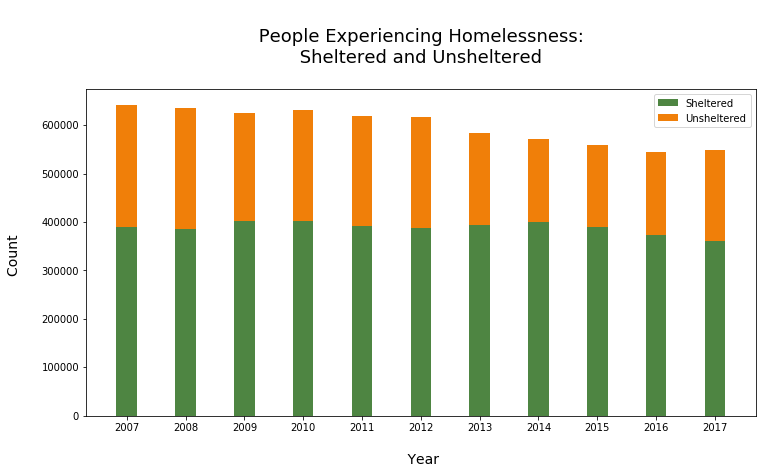

In [51]:
sheltered = shelter_summ.sheltered
unsheltered = shelter_summ.unsheltered
ind = np.arange(len(shelter_summ.total))    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

plt.subplots(figsize=(12, 6))
p1 = plt.bar(ind, sheltered, width, color='#4e8542', label='Sheltered')
p2 = plt.bar(ind, unsheltered, width, bottom=sheltered, color='#f07f09', label='Unsheltered')

plt.title('\n People Experiencing Homelessness: \n Sheltered and Unsheltered \n', fontsize=18)
plt.xlabel('\n Year', fontsize=14)
plt.ylabel('Count \n', fontsize=14)
plt.xticks(ind, range(2007, 2018))
plt.legend();

#### Family Status

In [6]:
df_family = pd.read_csv('datasets/homeless-family.csv')
df_family.shape

(153, 19)

In [18]:
df_family.columns

Index(['state', 'state_name', 'year', 'total', 'individual', 'family',
       'yparent', 'ypchild', 'non_ypfam', 'sh_ind', 'uns_ind', 'sh_fam',
       'uns_fam', 'sh_yparent', 'uns_yparent', 'sh_ypchild', 'uns_ypchild',
       'sh_non_ypfam', 'uns_non_ypfam'],
      dtype='object')

In [7]:
fam_summ = df_family.groupby('year').sum()
fam_summ

,total,individual,family,yparent,ypchild,non_ypfam,sh_ind,uns_ind,sh_fam,uns_fam,sh_yparent,uns_yparent,sh_ypchild,uns_ypchild,sh_non_ypfam,uns_non_ypfam
year,,,,,,,,,,,,,,,,
2015,558573.0,353879.0,204694.0,9854.0,13175.0,181665.0,204508.0,149371.0,185339.0,19355.0,9431.0,423.0,12620.0,555.0,163288.0,18377.0
2016,544084.0,350878.0,193206.0,9851.0,13264.0,170091.0,197035.0,153843.0,175014.0,18192.0,9344.0,507.0,12620.0,644.0,153050.0,17041.0
2017,548312.0,365148.0,183164.0,9404.0,12108.0,161652.0,192254.0,172894.0,167415.0,15749.0,8841.0,563.0,11407.0,701.0,147167.0,14485.0


Confirm data configurations

In [8]:
(fam_summ.sh_ind + fam_summ.uns_ind + fam_summ.sh_fam + fam_summ.uns_fam == fam_summ.total).sum()

3

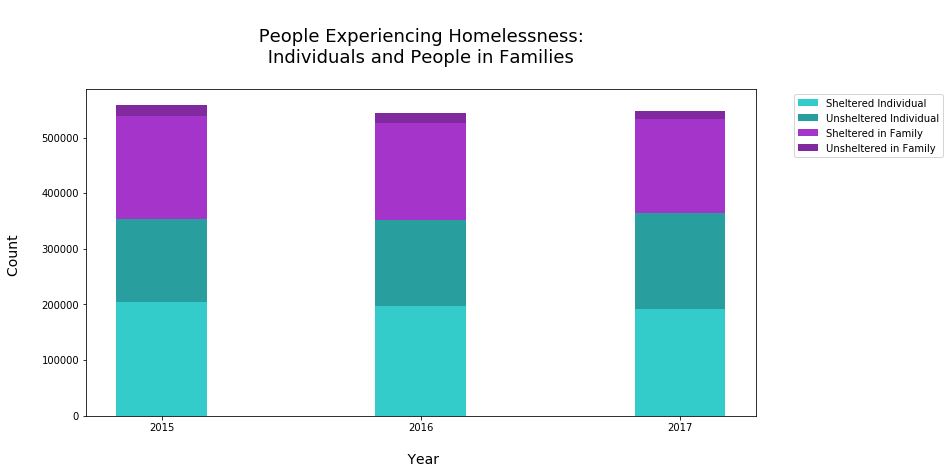

In [53]:
sh_ind = fam_summ.sh_ind
uns_ind = fam_summ.uns_ind
sh_fam = fam_summ.sh_fam
uns_fam = fam_summ.uns_fam
ind = np.arange(len(fam_summ.total))    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

plt.subplots(figsize=(12, 6))
p1 = plt.bar(ind, sh_ind, width, color='#34cbcb', label='Sheltered Individual')
p2 = plt.bar(ind, uns_ind, width, bottom=sh_ind, color='#299e9e', label='Unsheltered Individual')
p3 = plt.bar(ind, sh_fam, width, bottom=sh_ind + uns_ind, color='#a534cb', label='Sheltered in Family')
p4 = plt.bar(ind, uns_fam, width, bottom=sh_ind + uns_ind + sh_fam, color='#81299e', label='Unsheltered in Family')

plt.title('\n People Experiencing Homelessness: \n Individuals and People in Families \n', fontsize=18)
plt.xlabel('\n Year', fontsize=14)
plt.ylabel('Count \n', fontsize=14)
plt.xticks(ind, range(2015, 2018))
plt.legend(bbox_to_anchor=(1.05, 1));

#### Homelessness Type

In [9]:
df_type = pd.read_csv('datasets/homeless-type.csv')
df_type.shape

(561, 12)

In [19]:
df_type.columns

Index(['state', 'state_name', 'year', 'total', 'chronic', 'sh_chronic',
       'uns_chronic', 'non_chronic', 'sh_chronic_ind', 'uns_chronic_ind',
       'sh_chronic_fam', 'uns_chronic_fam'],
      dtype='object')

In [10]:
type_summ = df_type.groupby('year').sum()
type_summ

,total,chronic,sh_chronic,uns_chronic,non_chronic,sh_chronic_ind,uns_chronic_ind,sh_chronic_fam,uns_chronic_fam
year,,,,,,,,,
2007,641665.0,116422.0,41183.0,75239.0,525243.0,39617.0,21262.0,0.0,0.0
2008,635445.0,116635.0,44327.0,72308.0,518810.0,38413.0,23631.0,0.0,0.0
2009,624598.0,104561.0,44908.0,59653.0,520037.0,43383.0,29829.0,0.0,0.0
2010,630806.0,103431.0,42624.0,60807.0,527375.0,43389.0,30523.0,0.0,0.0
2011,618611.0,114904.0,45601.0,69303.0,503707.0,38718.0,62937.0,6883.0,6366.0
2012,616556.0,108367.0,39307.0,69060.0,508189.0,32446.0,62010.0,6861.0,7050.0
2013,584483.0,100321.0,37306.0,63015.0,484162.0,29161.0,55361.0,8145.0,7654.0
2014,570514.0,96914.0,40370.0,56544.0,473600.0,31008.0,51302.0,9362.0,5242.0
2015,558573.0,94344.0,36568.0,57776.0,464229.0,28156.0,53350.0,8412.0,4426.0


Confirm data configurations

In [12]:
(type_summ.sh_chronic + type_summ.uns_chronic + type_summ.non_chronic == type_summ.total).sum()

11

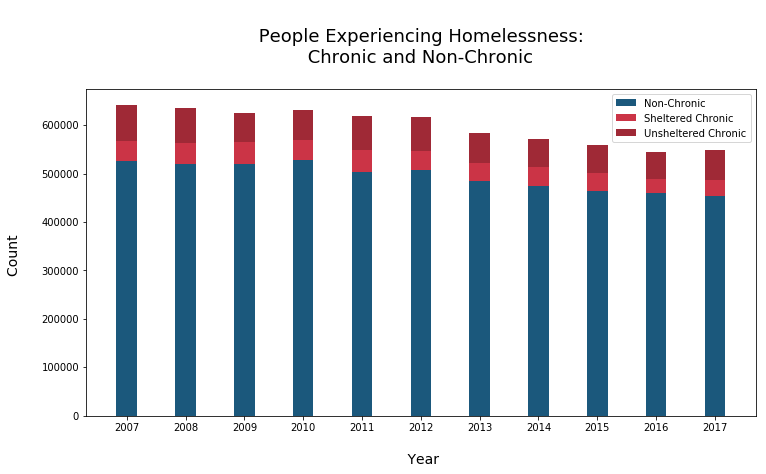

In [15]:
sh_chronic = type_summ.sh_chronic
uns_chronic = type_summ.uns_chronic
non_chronic = type_summ.non_chronic
ind = np.arange(len(type_summ.total))    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

plt.subplots(figsize=(12, 6))
p1 = plt.bar(ind, non_chronic, width, color='#1b587c', label='Non-Chronic')
p2 = plt.bar(ind, sh_chronic, width, bottom=non_chronic, color='#cb3446', label='Sheltered Chronic')
p3 = plt.bar(ind, uns_chronic, width, bottom=non_chronic + sh_chronic, color='#9f2936', label='Unsheltered Chronic')

plt.title('\n People Experiencing Homelessness: \n Chronic and Non-Chronic \n', fontsize=18)
plt.xlabel('\n Year', fontsize=14)
plt.ylabel('Count \n', fontsize=14)
plt.xticks(ind, range(2007, 2018))
plt.legend();

**To Do: Need to check why the totals don't align with sheltering type - count seems very wrong**

#### Veteran Status

In [16]:
df_vet = pd.read_csv('datasets/homeless-veteran.csv')
df_vet.shape

(357, 8)

In [17]:
vet_summ = df_vet.groupby('year').sum()
vet_summ

,total,veteran,non_veteran,sh_veteran,uns_veteran
year,,,,,
2011,618611.0,65253.0,553358.0,39976.0,25277.0
2012,616556.0,60399.0,556157.0,35107.0,25292.0
2013,584483.0,55472.0,529011.0,34865.0,20607.0
2014,570514.0,49534.0,520980.0,32067.0,17467.0
2015,558573.0,47504.0,511069.0,31445.0,16059.0
2016,544084.0,39272.0,504812.0,26359.0,12913.0
2017,548312.0,39915.0,508397.0,24650.0,15265.0


Confirm data configuration

In [18]:
(vet_summ.non_veteran + vet_summ.sh_veteran + vet_summ.uns_veteran == vet_summ.total).sum()

7

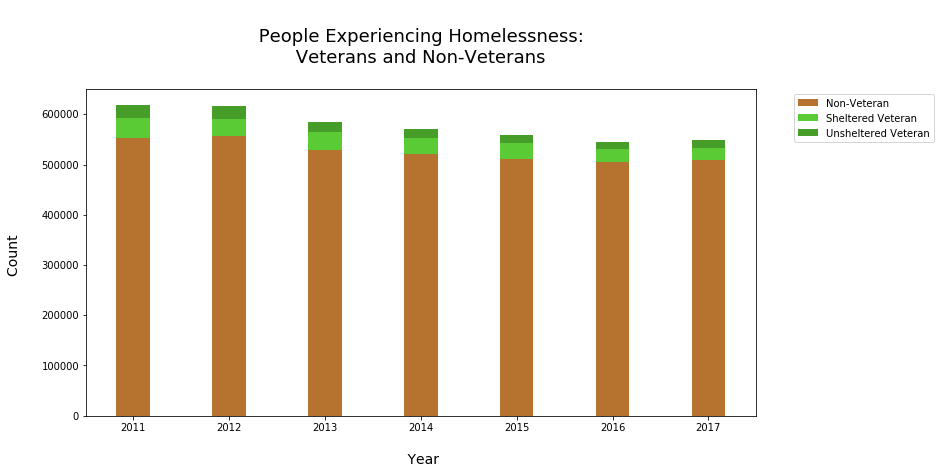

In [57]:
non_vet = vet_summ.non_veteran
sh_vet = vet_summ.sh_veteran
uns_vet = vet_summ.uns_veteran
ind = np.arange(len(vet_summ.total))    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

plt.subplots(figsize=(12, 6))
p1 = plt.bar(ind, non_vet, width, color='#b6732f', label='Non-Veteran')
p2 = plt.bar(ind, sh_vet, width, bottom=non_vet, color='#5acb34', label='Sheltered Veteran')
p3 = plt.bar(ind, uns_vet, width, bottom=non_vet + sh_vet, color='#469e29', label='Unsheltered Veteran')

plt.title('\n People Experiencing Homelessness: \n Veterans and Non-Veterans \n', fontsize=18)
plt.xlabel('\n Year', fontsize=14)
plt.ylabel('Count \n', fontsize=14)
plt.xticks(ind, range(2011, 2018))
plt.legend(bbox_to_anchor=(1.05, 1));

#### Age

In [19]:
df_age = pd.read_csv('datasets/homeless-age.csv')
df_age.shape

(153, 31)

In [38]:
df_age.columns

Index(['state', 'state_name', 'year', 'total', 'youth', 'child', 'yadult',
       'yparent', 'yparent_u18', 'yparent_18to24', 'ypchild', 'adult',
       'non_ypfam', 'sh_youth', 'uns_youth', 'sh_child', 'uns_child',
       'sh_yadult', 'uns_yadult', 'sh_yparent', 'uns_yparent',
       'sh_yparent_u18', 'uns_yparent_u18', 'sh_yparent_18to24',
       'uns_yparent_18to24', 'sh_ypchild', 'uns_ypchild', 'sh_adult',
       'uns_adult', 'sh_non_ypfam', 'uns_non_ypfam'],
      dtype='object')

In [20]:
age_summ = df_age.groupby('year').sum()
age_summ

,total,youth,child,yadult,yparent,yparent_u18,yparent_18to24,ypchild,adult,non_ypfam,...,sh_yparent_u18,uns_yparent_u18,sh_yparent_18to24,uns_yparent_18to24,sh_ypchild,uns_ypchild,sh_adult,uns_adult,sh_non_ypfam,uns_non_ypfam
year,,,,,,,,,,,,,,,,,,,,,
2015,558573.0,36715.0,4653.0,32062.0,9854.0,126.0,9728.0,13175.0,317164.0,181665.0,...,118.0,8.0,9313.0,415.0,12620.0,555.0,184737.0,132427.0,163288.0,18377.0
2016,544084.0,35508.0,3817.0,31691.0,9851.0,92.0,9759.0,13264.0,315370.0,170091.0,...,90.0,2.0,9254.0,505.0,12620.0,644.0,177903.0,137467.0,153050.0,17041.0
2017,548312.0,40658.0,4786.0,35872.0,9404.0,96.0,9308.0,12108.0,324490.0,161652.0,...,83.0,13.0,8758.0,550.0,11407.0,701.0,173761.0,150729.0,147167.0,14485.0


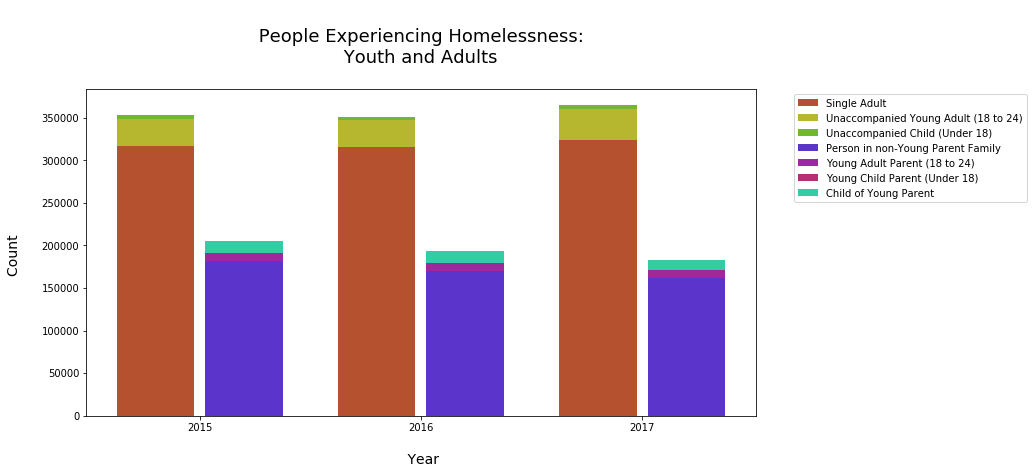

In [59]:
adult = age_summ.adult
yadult = age_summ.yadult
child = age_summ.child
non_ypfam = age_summ.non_ypfam
yparent_18to24 = age_summ.yparent_18to24
yparent_u18 = age_summ.yparent_u18
ypchild = age_summ.ypchild
ind_sing = np.arange(3)
ind_fam = ind_sing + 0.4
width = 0.35

plt.subplots(figsize=(12, 6))
p1 = plt.bar(ind_sing, adult, width, color='#b6512f', label='Single Adult')
p2 = plt.bar(ind_sing, yadult, width, bottom=adult, color='#b6b62f', label='Unaccompanied Young Adult (18 to 24)')
p3 = plt.bar(ind_sing, child, width, bottom=adult + yadult, color='#73b62f', label='Unaccompanied Child (Under 18)')

p4 = plt.bar(ind_fam, non_ypfam, width, color='#5a34cb', label='Person in non-Young Parent Family')
p5 = plt.bar(ind_fam, yparent_18to24, width, bottom=non_ypfam, color='#9e299e', label='Young Adult Parent (18 to 24)')
p6 = plt.bar(ind_fam, yparent_u18, width, bottom=non_ypfam + yparent_18to24, color='#b62f73', label='Young Child Parent (Under 18)')
p6 = plt.bar(ind_fam, ypchild, width, bottom=non_ypfam + yparent_18to24 + yparent_u18, color='#34cba5', label='Child of Young Parent')

plt.title('\n People Experiencing Homelessness: \n Youth and Adults \n', fontsize=18)
plt.xlabel('\n Year', fontsize=14)
plt.ylabel('Count \n', fontsize=14)
plt.xticks((ind_sing + ind_fam)/2, range(2015, 2018))
plt.legend(bbox_to_anchor=(1.05, 1));

In [60]:
age_summ.yparent_u18

year
2015    126.0
2016     92.0
2017     96.0
Name: yparent_u18, dtype: float64